# Stats on stylistic features per community

## 1M balanced dataset

In [1]:
import pandas as pd

# Load data
#communities = [
#    'voltron',
#    'bts',
#    'studyblr',
#    'miraculous_ladybug',
#    'riverdale',
#    'south_park',
#    'svtfoe',
#    'simblr',
#    'writers_on_tumblr',
#    'steven_universe',
#]
#
#data = {}
#for community in communities:
##     data[community] = pd.read_pickle(f'../../data/{community}_posts.pkl')
#    data[community] = pd.read_pickle(f'../../data/textposts_captions/{community}.pkl')

data = pd.read_pickle('/mnt/interns/myoder/textposts_captions_1m.pkl')
print(len(data))
print(data.columns)

1000000
Index(['post_tags_string', 'post_id', 'activity_time_epoch', 'tumblelog_id',
       'is_private', 'post_title', 'post_short_url', 'post_slug', 'post_type',
       'post_caption', 'post_format', 'post_note_count', 'post_tags',
       'post_content', 'reblogged_from_post_id', 'reblogged_from_metadata',
       'created_time_epoch', 'updated_time_epoch', 'is_submission', 'mentions',
       'source_title', 'source_url', 'post_classifier', 'blog_classifier',
       'activity_date', 'post_body', 'post_body_no_blognames', 'text_type',
       'style_features', 'community'],
      dtype='object')


In [2]:
row_features = data['style_features'].map(lambda x: x.keys())
features = set([f for feats in row_features for f in feats])
    
print(len(features))
features

1419


{'avg_💍_per_word',
 'avg_👋_per_word',
 'avg_✝_per_word',
 'avg_🚥_per_word',
 'avg_💮_per_word',
 'avg_⛴_per_word',
 'repeated_𝕤',
 'avg_🦳_per_word',
 'avg_🧦_per_word',
 'avg_🕘_per_word',
 'avg_⛲_per_word',
 'avg_🛐_per_word',
 'avg_📁_per_word',
 'avg_👫_per_word',
 'avg_👍_per_word',
 'avg_🧯_per_word',
 'repeated_你',
 'avg_🎸_per_word',
 'avg_🐌_per_word',
 'avg_🚐_per_word',
 'avg_🔉_per_word',
 'avg_gr8_per_word',
 'avg_💀_per_word',
 'avg_🌷_per_word',
 'avg_👓_per_word',
 'avg_🦏_per_word',
 'avg_🌚_per_word',
 'repeated_√',
 'repeated_/',
 'avg_❣_per_word',
 'repeated_o',
 'avg_🥡_per_word',
 'avg_👰_per_word',
 'avg_🐇_per_word',
 'avg_🍤_per_word',
 'avg_🤝_per_word',
 'avg_🥘_per_word',
 'repeated_Э',
 'avg_➿_per_word',
 'repeated_ф',
 'avg_👎_per_word',
 'avg_🚊_per_word',
 'repeated_h',
 'avg_🎢_per_word',
 'avg_🐪_per_word',
 'avg_🏃_per_word',
 'avg_🏜_per_word',
 'avg_🤮_per_word',
 'avg_🙏_per_word',
 'avg_😾_per_word',
 'avg_._per_word',
 'repeated_e',
 'repeated_>',
 'repeated_﹌',
 'avg_📠_per_word

In [6]:
# Get feature averages

import numpy as np
from tqdm import tqdm_notebook as tqdm

feature_avgs = {f: {} for f in features}

communities = data['community'].unique().tolist()
for c in tqdm(communities):
    community_data = data.loc[data['community']==c, 'style_features']
    for f in tqdm(features):
        
        # Slightly faster method
        feature_rows = community_data[community_data.map(lambda x: f in x.keys())]
        feature_sum = sum(feature_rows.map(lambda x: x[f]))
        feature_avgs[f][c] = feature_sum/len(community_data)
        
#         feature_values = community_data.map(lambda x: x.get(f, 0))
#         feature_avgs[f][c] = np.mean(feature_values)

In [7]:
# Select features with highest std dev among feature averages across communities

pd.set_option('display.max_rows', 999)

lines = []
for f in features:
    line = [f]
    for c in communities:
        line.append(feature_avgs[f][c])
    line.append(np.std(line[-1*len(communities):]))
        
    lines.append(line)
    
avgs = pd.DataFrame(lines, columns=['feature', *[c for c in communities], 'std_dev']).sort_values('std_dev', ascending=False).reset_index(drop=True)
selected_features = avgs['feature'].loc[:10].tolist()
print(selected_features)

avgs

['n_characters', 'n_words', 'n_oov', 'n_capitals', 'avg_oov', 'avg_capitalized_words', 'total_char_repeats', 'avg_punctuation', 'avg_"_per_word', 'avg_/_per_word', 'avg_._per_word']


,feature,riverdale,bts,simblr,miraculous_ladybug,south_park,steven_universe,studyblr,svtfoe,voltron,writers_on_tumblr,std_dev
0,n_characters,3.421839e+02,9.312649e+02,2.690574e+02,2.976181e+02,1.376978e+02,3.749845e+02,3.235504e+02,1.599148e+02,3.202595e+02,7.537070e+02,2.401642e+02
1,n_words,7.295338e+01,1.999881e+02,5.738574e+01,6.301783e+01,2.965777e+01,7.606801e+01,6.604949e+01,3.374537e+01,6.771846e+01,1.594498e+02,5.150325e+01
2,n_oov,2.224103e+01,5.843390e+01,2.060657e+01,1.991446e+01,1.025450e+01,2.446813e+01,2.068089e+01,1.162242e+01,2.140518e+01,4.520939e+01,1.415956e+01
3,n_capitals,1.269083e+01,2.303862e+01,1.071198e+01,1.256886e+01,5.649290e+00,1.279519e+01,9.879030e+00,7.634480e+00,1.190477e+01,1.888286e+01,4.825981e+00
4,avg_oov,4.197504e-01,4.883154e-01,4.034211e-01,4.089026e-01,4.551259e-01,4.257135e-01,4.064676e-01,4.554215e-01,4.147452e-01,3.748794e-01,3.091062e-02
5,avg_capitalized_words,1.815510e-01,1.156561e-01,1.853226e-01,1.759510e-01,1.618927e-01,1.704240e-01,1.309504e-01,2.116875e-01,1.366440e-01,1.424567e-01,2.791373e-02
6,total_char_repeats,1.192900e-01,1.937500e-01,1.259900e-01,1.281100e-01,1.015200e-01,1.571200e-01,1.310100e-01,1.035500e-01,1.544900e-01,1.548700e-01,2.679200e-02
7,avg_punctuation,2.096345e-01,2.577127e-01,2.568784e-01,2.090955e-01,2.503924e-01,2.648792e-01,2.758673e-01,2.422165e-01,2.095169e-01,2.397292e-01,2.323373e-02
8,"avg_""_per_word",4.869817e-02,8.470129e-02,1.901109e-02,5.715505e-02,7.439960e-02,5.032180e-02,4.632149e-02,6.321377e-02,5.861652e-02,3.318826e-02,1.797474e-02
9,avg_/_per_word,7.453792e-03,9.090125e-03,3.866748e-02,7.493988e-03,1.240924e-02,2.725476e-02,4.533350e-02,9.689201e-03,6.658515e-03,2.739172e-02,1.365638e-02


In [8]:
# Reformat for seaborn plotting
pd.set_option('display.max_rows', 999)

lines = []
for f in features:
    for c in communities:
        line = [f, c, feature_avgs[f][c]]
        lines.append(line)
    
feat_values = pd.DataFrame(lines, columns=['feature', 'community', 'value'])
feat_values

,feature,community,value
0,avg_💍_per_word,riverdale,2.184890e-05
1,avg_💍_per_word,bts,1.848015e-05
2,avg_💍_per_word,simblr,3.237238e-05
3,avg_💍_per_word,miraculous_ladybug,2.500000e-05
4,avg_💍_per_word,south_park,8.678571e-06
5,avg_💍_per_word,steven_universe,1.473722e-05
6,avg_💍_per_word,studyblr,2.153834e-06
7,avg_💍_per_word,svtfoe,1.818182e-07
8,avg_💍_per_word,voltron,9.068432e-06
9,avg_💍_per_word,writers_on_tumblr,2.408669e-06


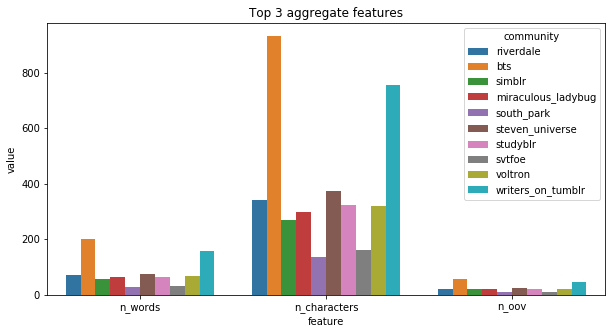

In [10]:
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
# sns.barplot(x='feature', hue=avgs.columns[1:-1], data=avgs.iloc[:10])
selected_features = avgs.iloc[:3]['feature'].tolist()
selected_data = feat_values[feat_values['feature'].isin(selected_features)]

plt.figure(figsize=(10,5))
sns.barplot(x='feature', y='value', hue='community', data=selected_data).set_title("Top 3 aggregate features")
plt.show()

Text(0.5, 1.0, 'Top 10 specific features')

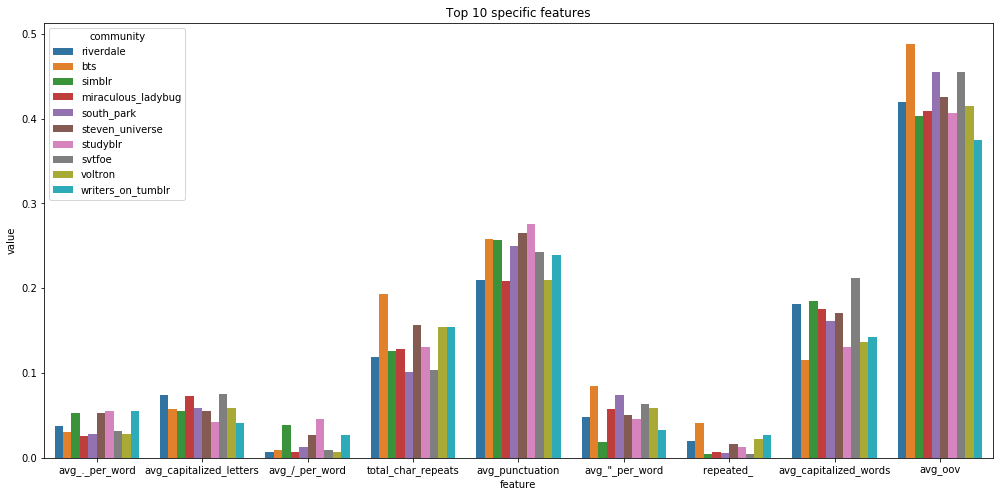

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
# sns.barplot(x='feature', hue=avgs.columns[1:-1], data=avgs.iloc[:10])
selected_features = avgs.iloc[4:13]['feature'].tolist()
selected_data = feat_values[feat_values['feature'].isin(selected_features)]

plt.figure(figsize=(17,8))
sns.barplot(x='feature', y='value', hue='community', data=selected_data).set_title('Top 10 specific features')

## Textposts/captions by community

In [1]:
import pandas as pd

# Load data
#communities = [
#    'voltron',
#    'bts',
#    'studyblr',
#    'miraculous_ladybug',
#    'riverdale',
#    'south_park',
#    'svtfoe',
#    'simblr',
#    'writers_on_tumblr',
#    'steven_universe',
#]
#
#data = {}
#for community in communities:
##     data[community] = pd.read_pickle(f'../../data/{community}_posts.pkl')
#    data[community] = pd.read_pickle(f'../../data/textposts_captions/{community}.pkl')

data = pd.read_pickle('/mnt/interns/myoder/textposts_captions_1m.pkl')
print(len(data))
print(data.columns)

1000000
Index(['post_tags_string', 'post_id', 'activity_time_epoch', 'tumblelog_id',
       'is_private', 'post_title', 'post_short_url', 'post_slug', 'post_type',
       'post_caption', 'post_format', 'post_note_count', 'post_tags',
       'post_content', 'reblogged_from_post_id', 'reblogged_from_metadata',
       'created_time_epoch', 'updated_time_epoch', 'is_submission', 'mentions',
       'source_title', 'source_url', 'post_classifier', 'blog_classifier',
       'activity_date', 'post_body', 'post_body_no_blognames', 'text_type',
       'style_features', 'community'],
      dtype='object')


In [2]:
features = set()
#for community in communities:
#    row_features = data[community]['style_features'].map(lambda x: x.keys())
#    community_features = set([f for feats in row_features for f in feats])
#    features |= community_features
    
print(len(features))
features

437


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'avg_capitalized_letters',
 'avg_capitalized_words',
 'avg_oov',
 'avg_punctuation',
 'n_capitals',
 'n_characters',
 'n_oov',
 'n_words',
 'repeated_\t',
 'repeated_\n',
 'repeated_\r',
 'repeated_ ',
 'repeated_!',
 'repeated_#',
 'repeated_$',
 'repeated_%',
 'repeated_(',
 'repeated_)',
 'repeated_*',
 'repeated_+',
 'repeated_,',
 'repeated_-',
 'repeated_.',
 'repeated_/',
 'repeated_0',
 'repeated_1',
 'repeated_2',
 'repeated_3',
 'repeated_4',
 'repeated_5',
 'repeated_6',
 'repeated_7',
 'repeated_8',
 'repeated_9',
 'repeated_:',
 'repeated_;',
 'repeated_=',
 'repeated_>',
 'repeated_?',
 'repeated_@',
 'repeated_[',
 'repeated_\\',
 'repeated_^',
 'repeated__',
 'repeated_a',
 'repeated_b',
 'repeated_c',
 'repeated_d',
 'repeated_e',
 'repeated_f',
 'repeated_g',
 'repeated_h',
 'repeated_i',
 'repeated_j

In [3]:
# Get feature averages

import numpy as np
from tqdm import tqdm_notebook as tqdm

feature_avgs = {f: {} for f in features}

for c in tqdm(communities):
    for f in features:
        feature_values = data[c]['style_features'].map(lambda x: x.get(f, 0))
        feature_avgs[f][c] = np.mean(feature_values)

In [4]:
# Select features with highest std dev among feature averages across communities

pd.set_option('display.max_rows', 999)

lines = []
for f in features:
    line = [f]
    for c in communities:
        line.append(feature_avgs[f][c])
    line.append(np.std(line[-1*len(communities):]))
        
    lines.append(line)
    
avgs = pd.DataFrame(lines, columns=['feature', *[c for c in communities], 'std_dev']).sort_values('std_dev', ascending=False).reset_index(drop=True)
selected_features = avgs['feature'].loc[:10].tolist()
print(selected_features)

avgs

['n_characters', 'n_words', 'n_oov', '.', ',', '?', '"', ':', '-', '#', '!']


,feature,voltron,bts,studyblr,miraculous_ladybug,riverdale,south_park,svtfoe,simblr,writers_on_tumblr,steven_universe,std_dev
0,n_characters,326.600993,661.482215,335.239281,258.119230,342.317990,133.290158,159.529059,324.472033,756.755407,343.858782,1.880591e+02
1,n_words,69.063641,141.608252,68.491333,54.013844,72.931525,28.077800,33.673130,67.863068,159.963573,69.224971,4.018635e+01
2,n_oov,21.835255,42.480395,21.445027,17.724580,22.277135,9.989605,11.583849,25.338605,45.368770,22.949476,1.097707e+01
3,.,2.834846,6.749298,2.794999,2.140574,3.438833,0.952067,1.281076,2.748739,7.925086,3.024308,2.121640e+00
4,",",2.472603,5.806965,2.270833,1.792742,2.585210,0.769161,0.986252,2.121992,6.959451,2.537158,1.890090e+00
5,?,0.727572,1.437248,0.703991,0.636772,0.848300,0.320776,0.419610,1.152749,1.546691,0.774511,3.839556e-01
6,"""",0.670111,0.032778,0.505845,0.017078,0.614995,0.009232,0.722435,0.005398,0.390300,0.099789,2.876791e-01
7,:,0.837195,1.174217,0.646325,1.040673,0.602512,0.932893,0.525967,1.302810,0.589916,0.810338,2.510686e-01
8,-,0.425543,0.709674,0.633684,0.503374,0.400773,0.419324,0.288597,0.945988,0.890795,0.660169,2.070366e-01
9,#,0.040393,0.125333,0.473219,0.028898,0.103917,0.010858,0.327167,0.074471,0.500830,0.502295,1.975550e-01


In [5]:
# Reformat for seaborn plotting
pd.set_option('display.max_rows', 999)

lines = []
for f in features:
    for c in communities:
        line = [f, c, feature_avgs[f][c]]
        lines.append(line)
    
feat_values = pd.DataFrame(lines, columns=['feature', 'community', 'value'])
feat_values

,feature,community,value
0,repeated_í,voltron,0.000000
1,repeated_í,bts,0.000000
2,repeated_í,studyblr,0.000004
3,repeated_í,miraculous_ladybug,0.000000
4,repeated_í,riverdale,0.000000
5,repeated_í,south_park,0.000000
6,repeated_í,svtfoe,0.000000
7,repeated_í,simblr,0.000000
8,repeated_í,writers_on_tumblr,0.000000
9,repeated_í,steven_universe,0.000000


Text(0.5, 1.0, 'Top 3 aggregate features')

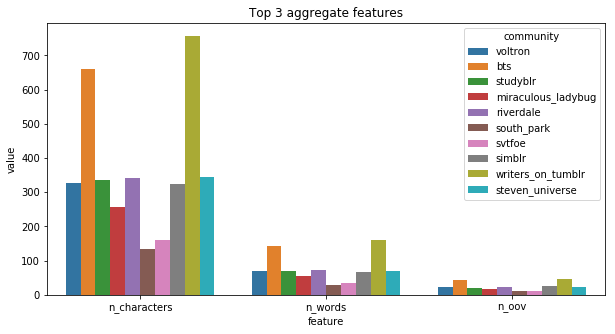

In [7]:
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
# sns.barplot(x='feature', hue=avgs.columns[1:-1], data=avgs.iloc[:10])
selected_features = avgs.iloc[:3]['feature'].tolist()
selected_data = feat_values[feat_values['feature'].isin(selected_features)]

plt.figure(figsize=(10,5))
sns.barplot(x='feature', y='value', hue='community', data=selected_data).set_title("Top 3 aggregate features")

Text(0.5, 1.0, 'Top 10 specific features')

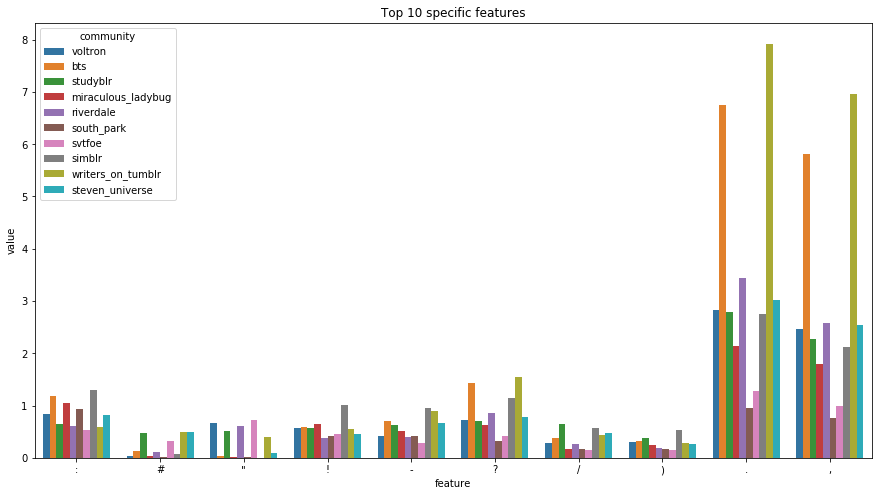

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
# sns.barplot(x='feature', hue=avgs.columns[1:-1], data=avgs.iloc[:10])
selected_features = avgs.iloc[3:13]['feature'].tolist()
selected_data = feat_values[feat_values['feature'].isin(selected_features)]

plt.figure(figsize=(15,8))
sns.barplot(x='feature', y='value', hue='community', data=selected_data).set_title('Top 10 specific features')

## Compare feature variation across text posts and captions

In [9]:
data['bts'].columns

Index(['post_tags_string', 'post_id', 'activity_time_epoch', 'tumblelog_id',
       'is_private', 'post_title', 'post_short_url', 'post_slug', 'post_type',
       'post_caption', 'post_format', 'post_note_count', 'post_tags',
       'post_content', 'reblogged_from_post_id', 'reblogged_from_metadata',
       'created_time_epoch', 'updated_time_epoch', 'is_submission', 'mentions',
       'source_title', 'source_url', 'post_classifier', 'blog_classifier',
       'activity_date', 'post_body', 'post_body_no_blognames', 'text_type',
       'style_features'],
      dtype='object')

In [11]:
# Separate text posts and captions

textposts = {}
captions = {}

for community in communities:
#     data[community] = pd.read_pickle(f'../../data/{community}_posts.pkl')
    textposts[community] = data[community][data[community]['text_type'] == 'text post']
    captions[community] = data[community][data[community]['text_type'] == 'caption']
    
    print(f'{community} text posts: {len(textposts[community])}, captions: {len(captions[community])}')

voltron text posts: 119327, captions: 88431
bts text posts: 83485, captions: 196672
studyblr text posts: 116428, captions: 130946
miraculous_ladybug text posts: 77881, captions: 258511
riverdale text posts: 148931, captions: 106533
south_park text posts: 35919, captions: 255674
svtfoe text posts: 16143, captions: 98349
simblr text posts: 116704, captions: 305112
writers_on_tumblr text posts: 125344, captions: 74564
steven_universe text posts: 177034, captions: 233402


In [12]:
# Create dataframe to compare average feature values across text types

lines = []

# Textposts
for community in tqdm(communities[:1]):
    for f in features:
        textposts[f] = textposts[c]['style_features'].map(lambda x: x.get(f, 0))
        lines.extend(list(zip(textposts[c]['text_type'], [f] * len(textposts[c]), textposts[f])))
        
feature_values = pd.DataFrame(lines, columns=['text_type', 'feature', 'feature_value'])

In [13]:
feature_values.shape

(77363858, 3)

In [17]:
# Get feature averages

import numpy as np
from tqdm import tqdm_notebook as tqdm

feature_avgs = {f: {} for f in features}

for d, text_type in zip([textposts, captions], ['text_post', 'caption']):
    for f in tqdm(features):
        feature_values = []
        for c in communities:
            feature_values.extend(d[c]['style_features'].map(lambda x: x.get(f, 0)))
        feature_avgs[f][text_type] = np.mean(feature_values)

In [22]:
feature_avgs_df = pd.DataFrame(feature_avgs).T
feature_avgs_df['diff'] = np.abs(feature_avgs_df['caption'] - feature_avgs_df['text post'])
feature_avgs_df.sort_values('diff', ascending=False, inplace=True)
feature_avgs_df

,caption,text post,diff
n_characters,1.465921e+02,7.280035e+02,5.814114e+02
n_words,3.025291e+01,1.532999e+02,1.230470e+02
n_oov,1.214450e+01,4.481073e+01,3.266622e+01
.,1.064953e+00,7.193681e+00,6.128728e+00
",",8.196087e-01,6.093072e+00,5.273463e+00
?,3.373035e-01,1.793278e+00,1.455974e+00
-,4.615901e-01,8.967131e-01,4.351230e-01
!,4.696149e-01,8.054161e-01,3.358011e-01
"""",3.446625e-01,3.983205e-02,3.048305e-01
#,3.108396e-01,3.120736e-02,2.796323e-01


In [29]:
feature_avgs_df['feature'] = feature_avgs_df.index
feature_avgs_df

,caption,text post,diff,feature
n_characters,1.465921e+02,7.280035e+02,5.814114e+02,n_characters
n_words,3.025291e+01,1.532999e+02,1.230470e+02,n_words
n_oov,1.214450e+01,4.481073e+01,3.266622e+01,n_oov
.,1.064953e+00,7.193681e+00,6.128728e+00,.
",",8.196087e-01,6.093072e+00,5.273463e+00,","
?,3.373035e-01,1.793278e+00,1.455974e+00,?
-,4.615901e-01,8.967131e-01,4.351230e-01,-
!,4.696149e-01,8.054161e-01,3.358011e-01,!
"""",3.446625e-01,3.983205e-02,3.048305e-01,""""
#,3.108396e-01,3.120736e-02,2.796323e-01,#


In [31]:
plot_data = feature_avgs_df.iloc[:3].drop(columns=['diff'])
plot_data

,caption,text post,feature
n_characters,146.592121,728.003532,n_characters
n_words,30.252910,153.299886,n_words
n_oov,12.144505,44.810726,n_oov


In [35]:
plot_data = plot_data.melt(id_vars=['feature'], var_name=['text_type'], value_name='feature_avg')
plot_data

,feature,text_type,feature_avg
0,n_characters,caption,146.592121
1,n_words,caption,30.252910
2,n_oov,caption,12.144505
3,n_characters,text post,728.003532
4,n_words,text post,153.299886
5,n_oov,text post,44.810726


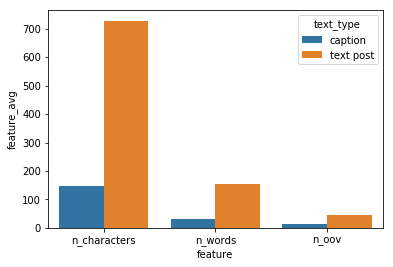

In [36]:
import seaborn as sns

sns.barplot(x='feature', y='feature_avg', hue='text_type', data=plot_data)

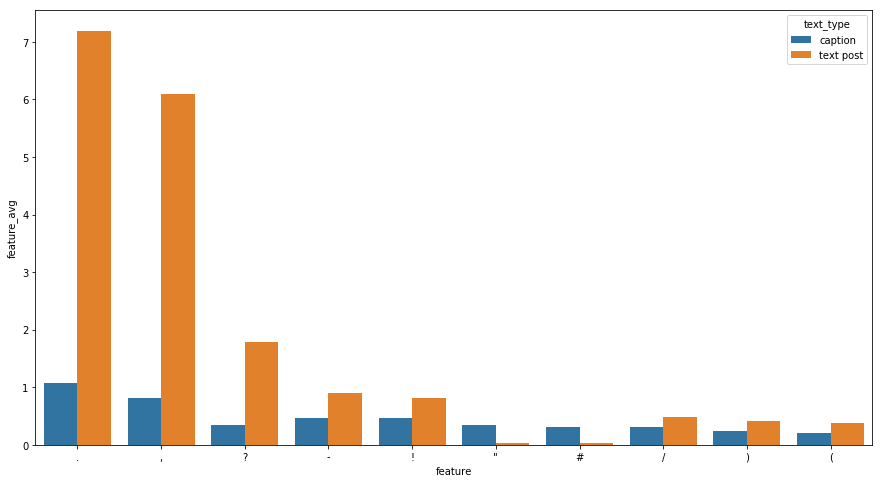

In [39]:
plot_data = feature_avgs_df.iloc[3:13].drop(columns=['diff'])
plot_data = plot_data.melt(id_vars=['feature'], var_name=['text_type'], value_name='feature_avg')
plt.figure(figsize=(15,8))
sns.barplot(x='feature', y='feature_avg', hue='text_type', data=plot_data)

## Compare feature variation across text posts and captions, within communities

In [3]:
import pandas as pd

# Load data
communities = [
    'voltron',
    'bts',
    'studyblr',
    'miraculous_ladybug',
    'riverdale',
    'south_park',
    'svtfoe',
    'simblr',
    'writers_on_tumblr',
    'steven_universe',
]

data = {}
for community in communities:
#     data[community] = pd.read_pickle(f'../../data/{community}_posts.pkl')
#     data[community] = pd.read_pickle(f'../../data/textposts_captions/{community}.pkl')
    data[community] = pd.read_pickle(f'/mnt/interns/myoder/textposts_captions/{community}.pkl')

In [4]:
# Separate text posts and captions

textposts = {}
captions = {}

for community in communities:
#     data[community] = pd.read_pickle(f'../../data/{community}_posts.pkl')
    textposts[community] = data[community][data[community]['text_type'] == 'text post']
    captions[community] = data[community][data[community]['text_type'] == 'caption']
    
    print(f'{community} text posts: {len(textposts[community])}, captions: {len(captions[community])}')

voltron text posts: 119327, captions: 88431
bts text posts: 83485, captions: 196672
studyblr text posts: 116428, captions: 130946
miraculous_ladybug text posts: 77881, captions: 258511
riverdale text posts: 148931, captions: 106533
south_park text posts: 35919, captions: 255674
svtfoe text posts: 16143, captions: 98349
simblr text posts: 116704, captions: 305112
writers_on_tumblr text posts: 125344, captions: 74564
steven_universe text posts: 177034, captions: 233402


In [6]:
features = set()
for community in communities:
    row_features = data[community]['style_features'].map(lambda x: x.keys())
    community_features = set([f for feats in row_features for f in feats])
    features |= community_features
    
print(len(features))
features

437


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'avg_capitalized_letters',
 'avg_capitalized_words',
 'avg_oov',
 'avg_punctuation',
 'n_capitals',
 'n_characters',
 'n_oov',
 'n_words',
 'repeated_\t',
 'repeated_\n',
 'repeated_\r',
 'repeated_ ',
 'repeated_!',
 'repeated_#',
 'repeated_$',
 'repeated_%',
 'repeated_(',
 'repeated_)',
 'repeated_*',
 'repeated_+',
 'repeated_,',
 'repeated_-',
 'repeated_.',
 'repeated_/',
 'repeated_0',
 'repeated_1',
 'repeated_2',
 'repeated_3',
 'repeated_4',
 'repeated_5',
 'repeated_6',
 'repeated_7',
 'repeated_8',
 'repeated_9',
 'repeated_:',
 'repeated_;',
 'repeated_=',
 'repeated_>',
 'repeated_?',
 'repeated_@',
 'repeated_[',
 'repeated_\\',
 'repeated_^',
 'repeated__',
 'repeated_a',
 'repeated_b',
 'repeated_c',
 'repeated_d',
 'repeated_e',
 'repeated_f',
 'repeated_g',
 'repeated_h',
 'repeated_i',
 'repeated_j

In [7]:
# Get feature averages

import numpy as np
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Manager, Pool

# feature_comm_avgs = {f: {c: {} for c in communities} for f in features}
manager = Manager()
feature_comm_avgs = manager.dict()

# for d, text_type in zip([textposts, captions], ['text_post', 'caption']):
#     for f in tqdm(features):
#         feature_comm_avgs[f] = manager.dict()
#         for c in communities:
#             feature_comm_avgs[f][c] = manager.dict()
#             feature_values = d[c]['style_features'].map(lambda x: x.get(f, 0))
#             feature_comm_avgs[f][c][text_type] = np.mean(feature_values)
            
def calculate_avg_textposts(feature):
    for c in communities:
        feature_comm_avgs[f][c] = manager.dict()
        feature_values = textposts[c]['style_features'].map(lambda x: x.get(f, 0))
        feature_comm_avgs[f][c]['text_post'] = np.mean(feature_values)
        
def calculate_avg_captions(feature):
    for c in communities:
        feature_comm_avgs[f][c] = manager.dict()
        feature_values = captions[c]['style_features'].map(lambda x: x.get(f, 0))
        feature_comm_avgs[f][c]['caption'] = np.mean(feature_values)
        
with Pool(20) as p:
    list(tqdm(p.imap(calculate_avg_textposts, features)), total=len(features))
with Pool(20) as p:
    list(tqdm(p.imap(calculate_avg_captions, features)), total=len(features))

In [10]:
# feat_comm_avgs = pd.DataFrame.from_dict({(f,c): feature_comm_avgs[f][c] 
#                                         for f in feature_comm_avgs.keys()
#                                         for c in feature_comm_avgs[f].keys()},
#                                         orient='index')

feat_comm_avgs = pd.DataFrame([[f, c, t, feature_comm_avgs[f][c][t]]
                                        for f in feature_comm_avgs.keys()
                                        for c in feature_comm_avgs[f].keys()
                                        for t in feature_comm_avgs[f][c].keys()
                                ],
                                        columns = ['feature', 'community', 'text_type', 'value']
                                        )
feat_comm_avgs

,feature,community,text_type,value
0,repeated_𝚗,voltron,text_post,0.000000
1,repeated_𝚗,voltron,caption,0.000000
2,repeated_𝚗,bts,text_post,0.000000
3,repeated_𝚗,bts,caption,0.000000
4,repeated_𝚗,studyblr,text_post,0.000000
5,repeated_𝚗,studyblr,caption,0.000000
6,repeated_𝚗,miraculous_ladybug,text_post,0.000000
7,repeated_𝚗,miraculous_ladybug,caption,0.000000
8,repeated_𝚗,riverdale,text_post,0.000000
9,repeated_𝚗,riverdale,caption,0.000000


In [22]:
# top3_feats = feature_avgs_df.iloc[:3]['feature'].tolist()
# top10_feats = feature_avgs_df.iloc[3:13]['feature'].tolist()
top3_feats = ['n_characters', 'n_words', 'n_oov']
top10_feats = ['.', ',', '?', '-', '!', '"', '#', '/', ')', '(']
print(top3_feats)
print(top10_feats)

['n_characters', 'n_words', 'n_oov']
['.', ',', '?', '-', '!', '"', '#', '/', ')', '(']


In [30]:
plot_data_comm = {}

for c in communities:
#     plot_data_comm[c] = feat_comm_avgs.loc[(feat_comm_avgs['feature'].isin(top3_feats)) & (feat_comm_avgs['community']==c)]
    plot_data_comm[c] = feat_comm_avgs.loc[(feat_comm_avgs['feature'].isin(top10_feats)) & (feat_comm_avgs['community']==c)]

len(plot_data_comm)

10

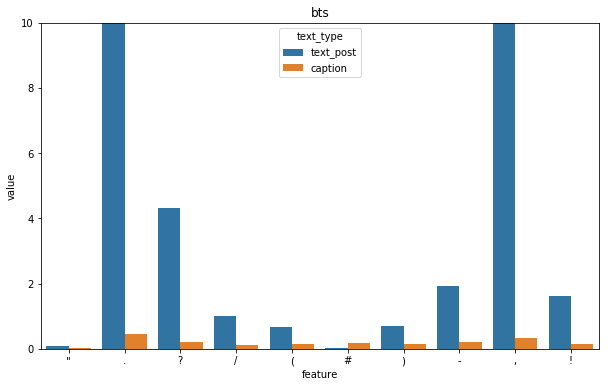

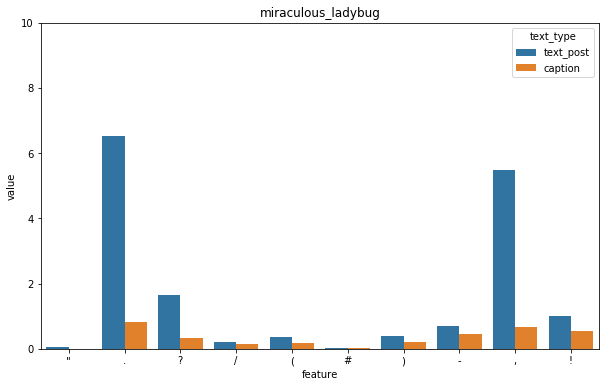

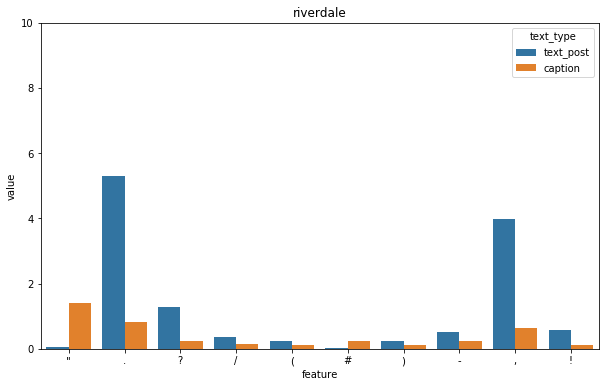

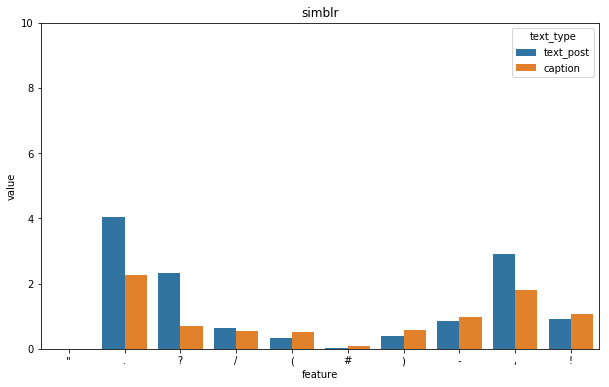

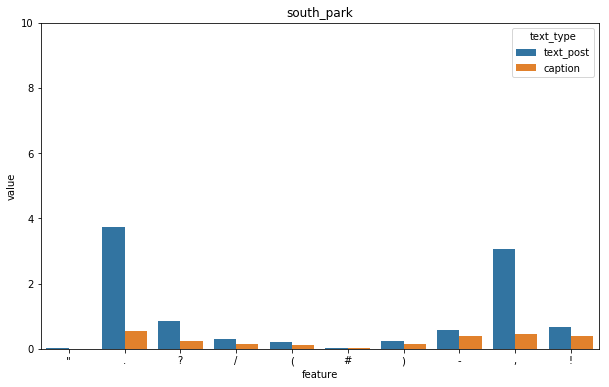

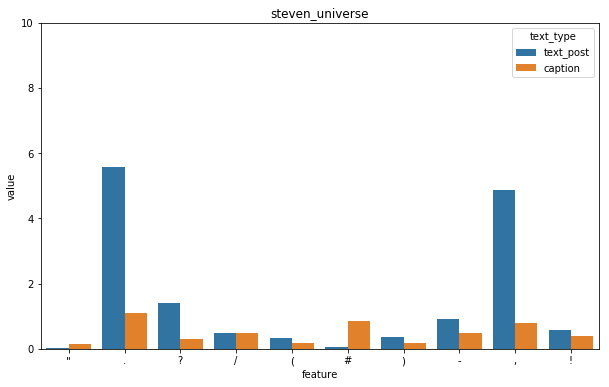

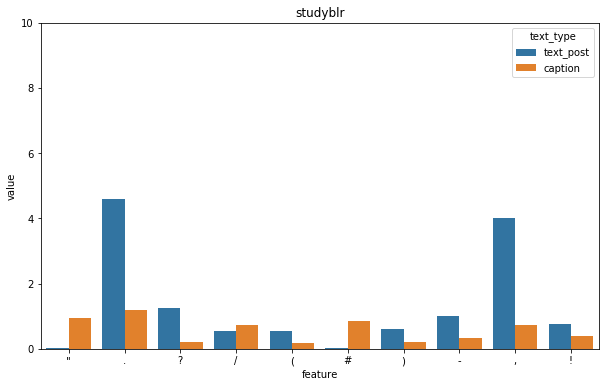

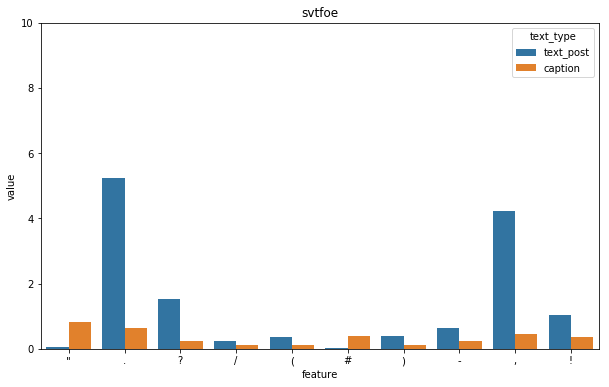

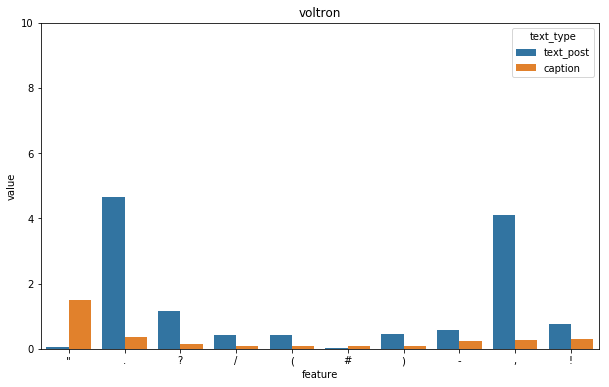

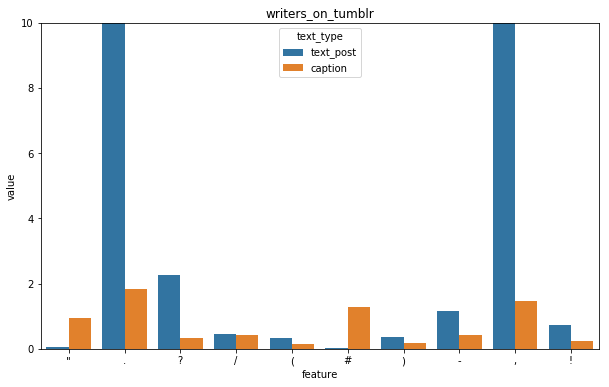

In [33]:
# Top 10 features

import matplotlib.pyplot as plt
import seaborn as sns

for c in sorted(communities):
    plt.figure(figsize=(10,6))
    plt.ylim(0,10)
    plt.title(c)
    sns.barplot(x='feature', y='value', hue='text_type', data=plot_data_comm[c])

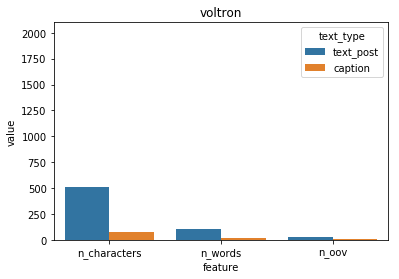

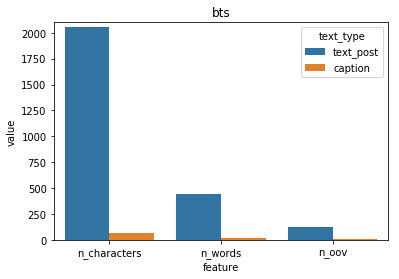

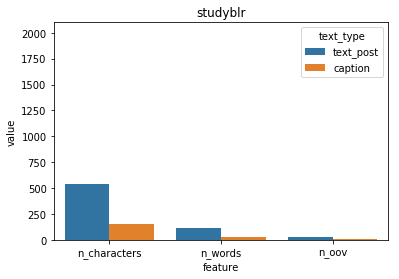

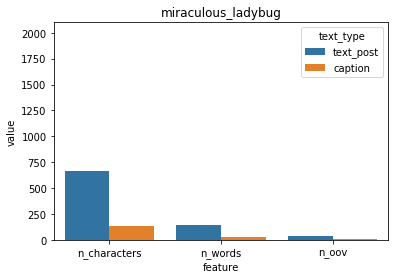

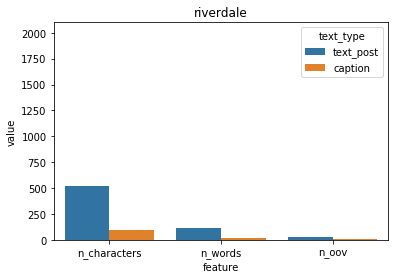

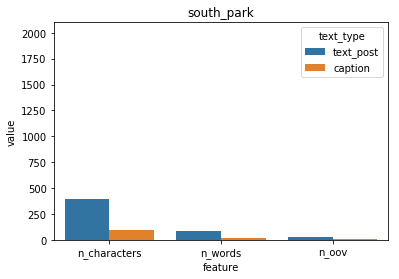

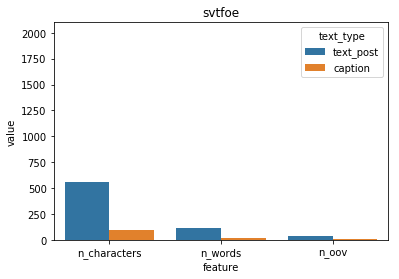

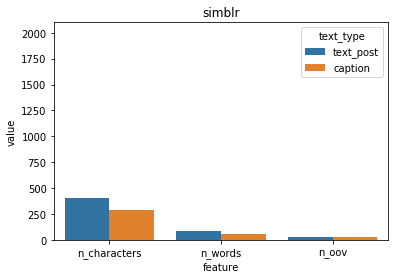

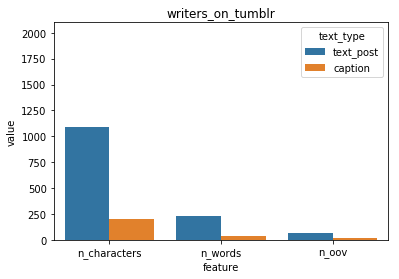

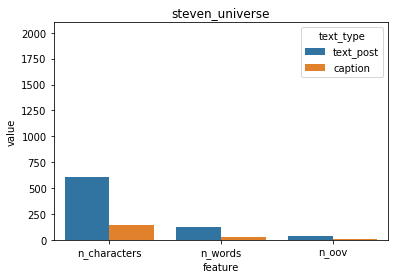

In [28]:
# Top 3 features

import matplotlib.pyplot as plt
import seaborn as sns

for c in communities:
    plt.figure(figsize=(6,4))
    plt.ylim(0, 2100)
    plt.title(c)
    sns.barplot(x='feature', y='value', hue='text_type', data=plot_data_comm[c])

# Look at feature anomalies

In [34]:
# BTS period use in textposts
feature_values = textposts['bts']['style_features'].map(lambda x: x.get('.', 0))
len(feature_values)

83485

In [35]:
max(feature_values)

3756

In [39]:
feature_values[feature_values==3756]

44419    3756
Name: style_features, dtype: int64

In [45]:
textposts['bts'].iloc[54]['post_body']

'kthsfatgf : okay i do n’t want to reblog that because it ’s very graphic and i ’m scared that i ’m not going to be able to tag it correctly but basically go look at @taesjuicytoes post ( this has a graphic image of a dead pig and contains blood ) right here where another crazy is out here threatening jimin for a concert sep . 5'

In [42]:
len(textposts['bts'].loc[44419]['post_body'].split())

48687

In [43]:
test = textposts['bts'].loc[44419]['post_body']
test.count('.')

3756

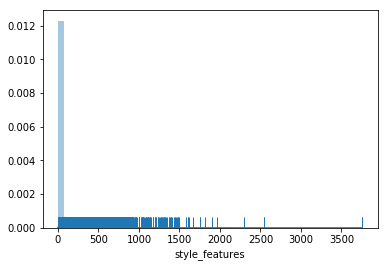

In [37]:
sns.distplot(feature_values, rug=True)